<a href="https://colab.research.google.com/github/dev02chandan/computer_vision/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim:
Experiment 6 Use SIFT to locate and track key points of images

* Task 1: Detect, compute and draw key points on an image
* Task 2: Rotate the image
* Task 3: Compare  SIFT features of two images and track matching ones
* Task 4: Crop a part of image and repeat the above tasks
* Task 5: change parameters of SIFT and observe the changes

In [242]:
import cv2
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow

### Image 1

In [314]:
img1 = cv2.imread('6.png')

In [315]:
img_copy = cv2.imread('6.png')

In [316]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

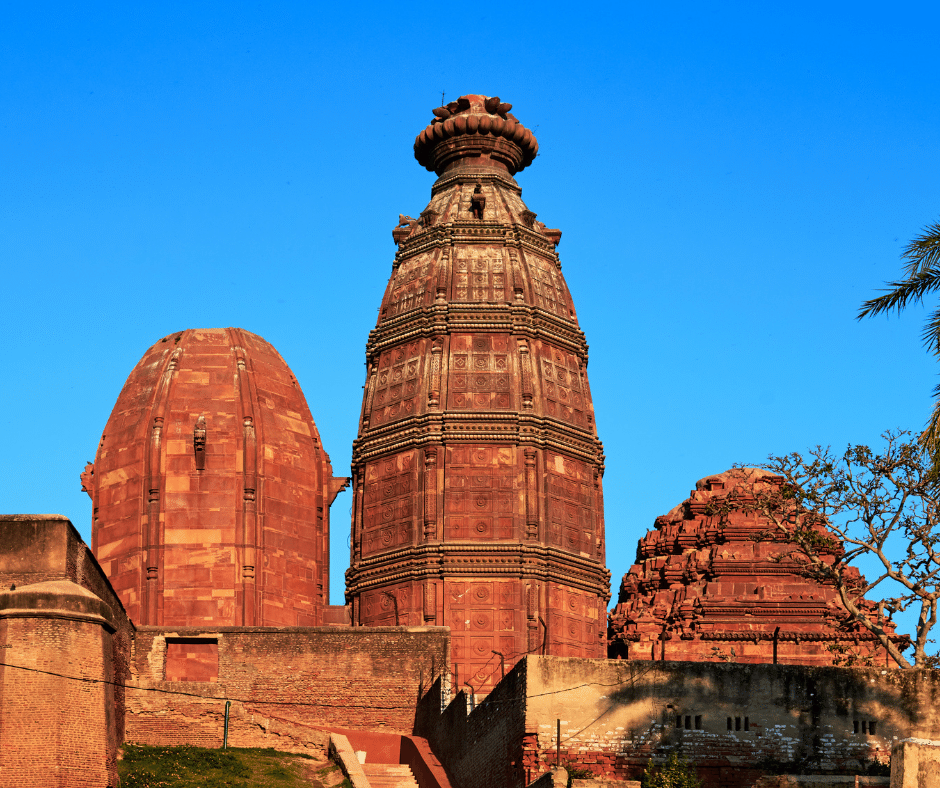

In [317]:
cv2_imshow(img1)

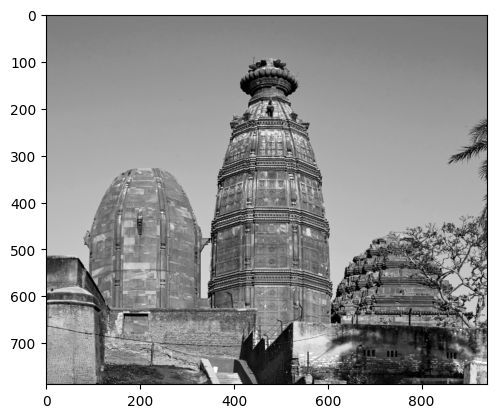

In [318]:
plt.imshow(img1_gray, cmap='gray')

In [319]:
sift = cv2.xfeatures2d.SIFT_create()

In [320]:
kp1 , des1 = sift.detectAndCompute(img1, None)

In [321]:
len(kp1)

5484

In [322]:
des1.shape

(5484, 128)

In [323]:
img1_kp = cv2.drawKeypoints(img1_gray, kp1, img1)

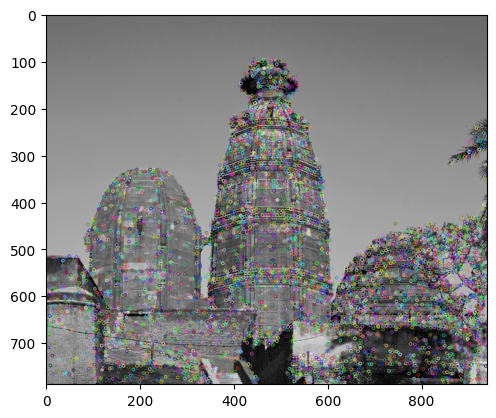

In [324]:
plt.imshow(img1_kp)

### Image Rotated

In [325]:
# Rotate the image by a specified angle (e.g., 90 degrees clockwise)
img2 = imutils.rotate(img_copy, angle=67)

In [326]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

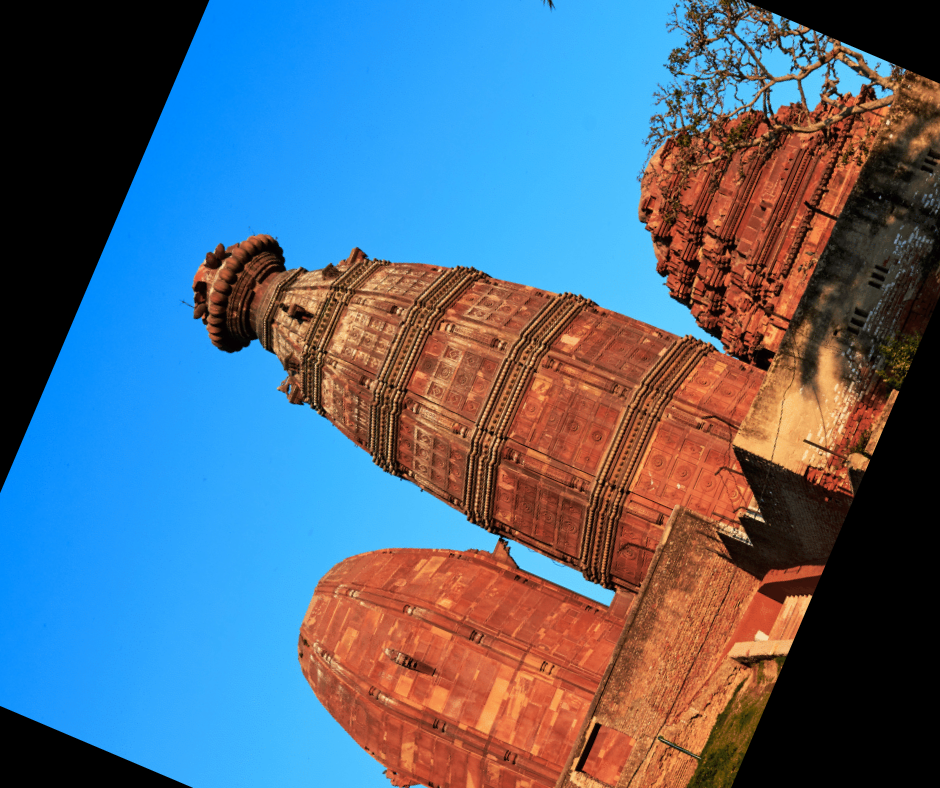

In [327]:
cv2_imshow(img2)

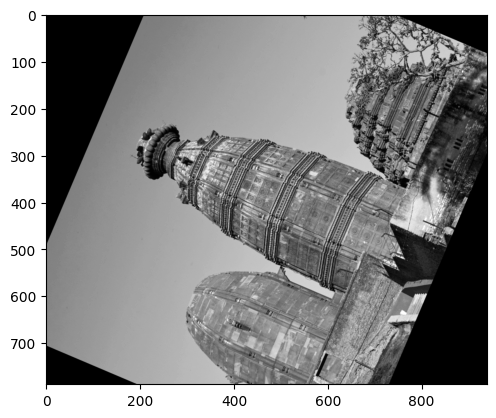

In [328]:
plt.imshow(img2_gray, cmap='gray')

In [329]:
# Compare  SIFT features of two images and track matching ones
kp2 , des2 = sift.detectAndCompute(img2, None)

In [330]:
len(kp2)

5989

In [331]:
len(des2)

5989

In [332]:
img2_kp = cv2.drawKeypoints(img2_gray, kp2, img2)

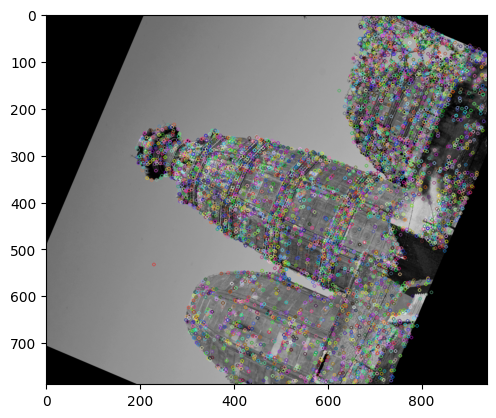

In [333]:
plt.imshow(img2_kp)

### Image Cropped

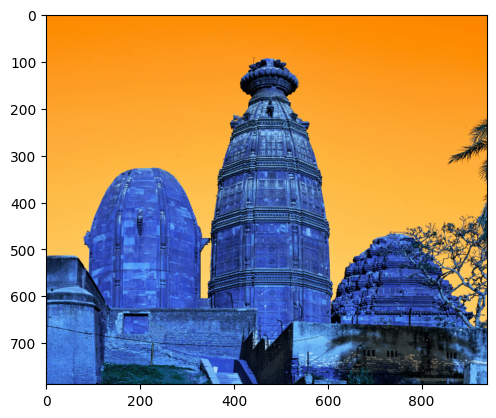

In [334]:
plt.imshow(img_copy, cmap='gray')

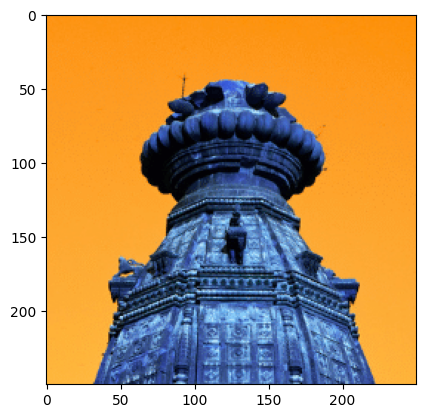

In [335]:
plt.imshow(img_copy[50:300, 350:600])

In [336]:
img3 = img_copy[50:300, 350:600]

In [337]:
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

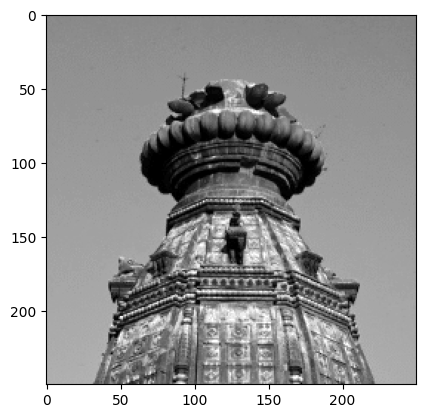

In [338]:
plt.imshow(img3_gray, cmap='gray')

In [339]:
kp3, des3 = sift.detectAndCompute(img3, None)

In [340]:
len(kp3)

551

In [341]:
len(des3)

551

In [342]:
img3_kp = cv2.drawKeypoints(img3_gray, kp3, img3)

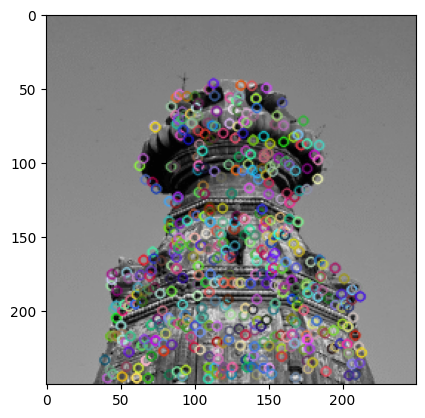

In [343]:
plt.imshow(img3_kp)

### Image Comparison

In [273]:
bf = cv2.BFMatcher()

In [274]:
kpmatch = bf.match(des1, des2)

In [275]:
len(kpmatch)

5484

In [276]:
kpmatchsort = sorted(kpmatch, key=lambda val:val.distance)

In [277]:
track_img = cv2.drawMatches(img1, kp1, img2, kp2, kpmatchsort[:15], None)

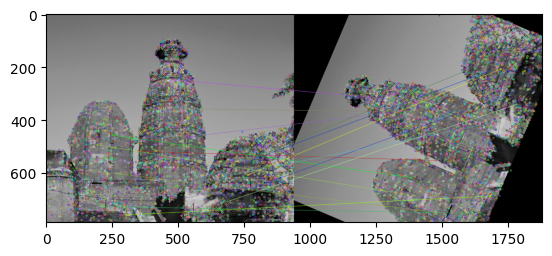

In [278]:
plt.imshow(track_img)

In [279]:
# Comparing Cropped and normal Image

In [352]:
bf1 = cv2.BFMatcher()

In [353]:
kpmatch1 = bf1.match(des1, des3)

In [354]:
(len(des3), len(des1))

(551, 5484)

In [355]:
kpmatchsort1 = sorted(kpmatch1, key=lambda val:val.distance)

In [356]:
len(kpmatch)

5484

In [357]:
len(kpmatchsort)

5484

In [368]:
track_img1 = cv2.drawMatches(img1, kp1, img3, kp3, kpmatchsort1[:300], None)

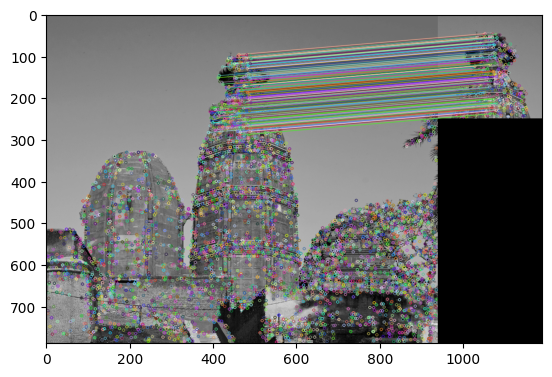

In [369]:
plt.imshow(track_img1)

### Changing Parametes

In [288]:
img1 = cv2.imread('6.png')

In [289]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [290]:
sift = cv2.xfeatures2d.SIFT_create(nfeatures=200)

In [291]:
kp1 , des1 = sift.detectAndCompute(img1, None)

In [292]:
len(kp1)

200

In [293]:
des1.shape

(200, 128)

In [294]:
img1_kp = cv2.drawKeypoints(img1_gray, kp1, img1)

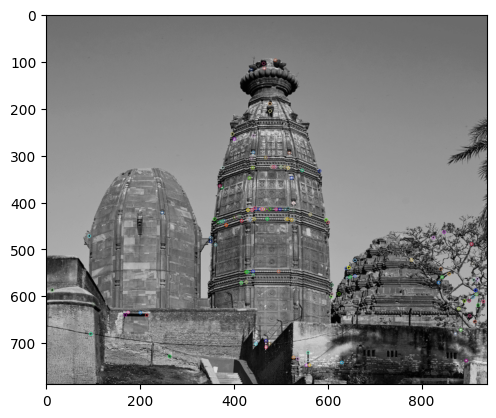

In [295]:
plt.imshow(img1_kp)

Here we can see that we can control the number of keypoints that are selected by the algorithm.

Let's See if we find False positives for the same

In [370]:
# Rotate the image by a specified angle (e.g., 90 degrees clockwise)
img2 = imutils.rotate(img_copy, angle=67)

In [371]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [372]:
sift = cv2.xfeatures2d.SIFT_create(nfeatures=200)

In [373]:
# Compare  SIFT features of two images and track matching ones
kp2 , des2 = sift.detectAndCompute(img2, None)

In [374]:
img2_kp = cv2.drawKeypoints(img2_gray, kp2, img2)

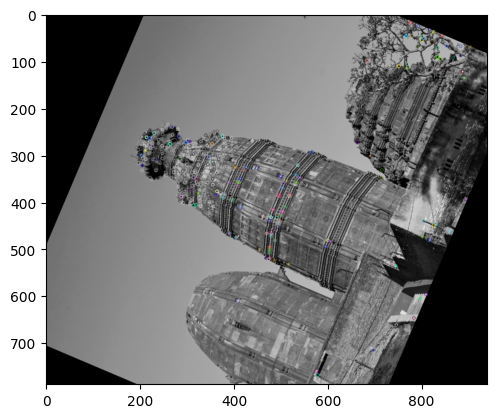

In [375]:
plt.imshow(img2_kp)

In [376]:
bf = cv2.BFMatcher()

In [377]:
kpmatch = bf.match(des1, des2)

In [378]:
len(kpmatch)

5484

In [379]:
kpmatchsort = sorted(kpmatch, key=lambda val:val.distance)

In [384]:
track_img = cv2.drawMatches(img1, kp1, img2, kp2, kpmatchsort[:30], None)

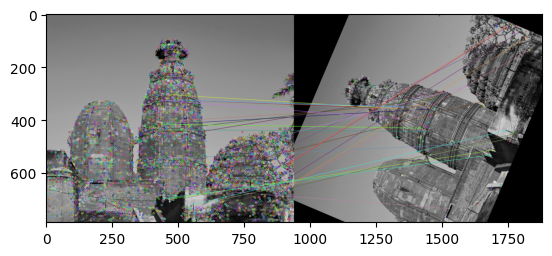

In [385]:
plt.imshow(track_img)

Let's try increasing the threshold to reduce the number of keypoints are selected

In [296]:
sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.1)

In [297]:
kp1 , des1 = sift.detectAndCompute(img1, None)

In [298]:
len(kp1)

2347

In [299]:
des1.shape

(2347, 128)

In [300]:
img1_kp = cv2.drawKeypoints(img1_gray, kp1, img1)

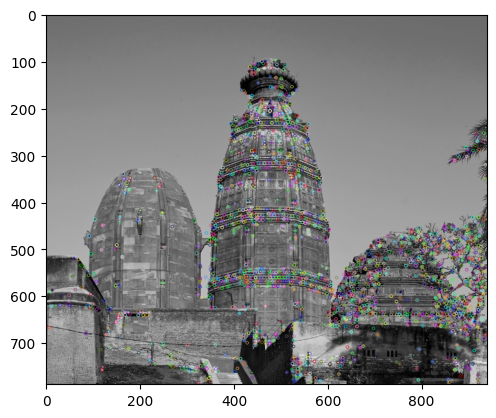

In [301]:
plt.imshow(img1_kp)

### Now Let's try a higher threshold to 0.5

In [302]:
sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.5)

In [303]:
kp1 , des1 = sift.detectAndCompute(img1, None)

In [304]:
len(kp1)

0

We see that there are no keypoints selected when the threshold is increased to a very large value

# Conclusion:

After the rotation the number of keypoints increase - why?

**Observations**

1. SIFT operator is used to draw kepoints on the given image.
2. The number of keypoints is 5484 and the corresponding descriptors have each a length of 128
3. If the image is rotated and cropped, then the number of keypoints changes to 5989
4. Brute Force Matcher is used to match the keypoints of the first with the remaining two images. It's found that most of the keypoints of the first image match with the corresponding keypoints in the remaining images.

**Changing Parameters**

1. If number of keypoints is restricted to 200, top 200 best matches are used to track two objects

2. If contrast Threshold is increased from default value of 0.03 to 0.1, we see the number of keypoints decreases from 5484 to 2347. This is because the Threshold applies to DoG values for selection of keypoints.
By increasing the threshold, the number of keypoints reduces.

*We also see that reducing the number of keypoints also decreases the number of false positives in the matching process*